In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
""
from glob import glob
import matplotlib.pyplot as plt
from sklearn import svm
from pathlib import Path
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
train_dir = Path('Kidney_stone_detection-main\Kidney_stone_detection-main\Dataset\Train')
Stone_cases_dir = train_dir / 'Kidney_stone'
normal_cases_dir = train_dir / 'Normal'
# Cyst_cases_dir = train_dir / 'Cyst'
Tumor_cases_dir = train_dir / 'Tumor'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Stone_cases = Stone_cases_dir.glob('*.png')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []


# Go through all the Cyst_cases . The label for these cases will be 1
# for img in Cyst_cases:
#     train_data.append((img, 0))
    # Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# # Go through all the normal cases. The label for these cases will be 0
for img in Stone_cases:
    train_data.append((img,1))

# # Go through all the Tumor_cases . The label for these cases will be 1
for img in Tumor_cases:
    train_data.append((img, 2))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,Kidney_stone_detection-main\Kidney_stone_detec...,1
1,Kidney_stone_detection-main\Kidney_stone_detec...,1
2,Kidney_stone_detection-main\Kidney_stone_detec...,1
3,Kidney_stone_detection-main\Kidney_stone_detec...,2
4,Kidney_stone_detection-main\Kidney_stone_detec...,1


In [4]:
cases_count = train_data['label'].value_counts()
print(cases_count)

label
0    828
1    625
2    603
Name: count, dtype: int64


In [5]:
Stone_cases_dir = train_dir / 'Kidney_stone'
normal_cases_dir = train_dir / 'Normal'
# Cyst_cases_dir = train_dir / 'Cyst'
Tumor_cases_dir = train_dir / 'Tumor'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Stone_cases = Stone_cases_dir.glob('*.png')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')

import cv2

train_data = []
train_labels = []
#from keras.utils.np_utils import to_categorical

# for img in Cyst_cases:
#     img = cv2.imread(str(img))
#     img = cv2.resize(img, (28,28))
#     if img.shape[2] ==1:
#         img = np.dstack([img, img, img])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img=np.array(img)
#     img = img/255
#     label = 'Cyst'
#     train_data.append(img)
#     train_labels.append(label)

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label ='Normal'
    train_data.append(img)
    train_labels.append(label)
                      
for img in Stone_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Stone'
    train_data.append(img)
    train_labels.append(label)
    
for img in Tumor_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tumor'
    train_data.append(img)
    train_labels.append(label)
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (2056, 128, 128, 3)
Total number of labels: (2056,)


In [6]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)


In [7]:
from sklearn.model_selection import train_test_split
train_data1 = train_data1.reshape(train_data1.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(train_data1, train_labels1, test_size=0.20, random_state=30)

In [14]:
from sklearn.neural_network import MLPClassifier

# Create an MLP classifier with two hidden layers, each having 50 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50, 50,50))

# Train the MLP on your training data
mlp.fit(X_train, y_train)

# Make predictions on new data
y_pred = mlp.predict(X_test)


C:\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9199029126213593


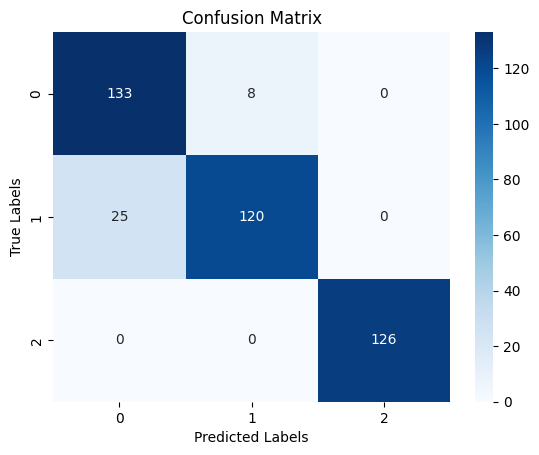

In [15]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the accuracy of the MLP classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
# y_pred
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Plot the ROC curve


In [16]:
import cv2
import numpy as np

pic = []

img = cv2.imread("Kidney_stone_detection-main\\Kidney_stone_detection-main\\Dataset\\Train\\Tumor\\Tumor- (208).jpg")
img = cv2.resize(img, (128, 128))
if img.shape[2] == 1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img)
img = img / 255

pic.append(img)
pic_np = np.array(pic)  # Convert the list pic to a NumPy array
pic1_2d = pic_np.reshape(pic_np.shape[0], -1)

a = mlp.predict(pic1_2d)
print(a)


['Tumor']


In [11]:
import joblib

# Save the trained model to a file
joblib.dump(mlp, 'mlp_model.pkl')


['mlp_model.pkl']

In [13]:
import joblib

# Load the saved model from the file
mlp = joblib.load('mlp_model.pkl')
pic=[]
import cv2

img = cv2.imread(str("Kidney_stone_detection-main\\Kidney_stone_detection-main\\Dataset\\Train\\Tumor\\Tumor- (208).jpg"))
img = cv2.resize(img, (128,128))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)

pic.append(img)
pic = np.array(pic)

pic= pic.reshape(pic.shape[0], -1)
a=mlp.predict(pic)
a

# Use the loaded model for predictions


array(['Tumor'], dtype='<U6')